import numpy as np
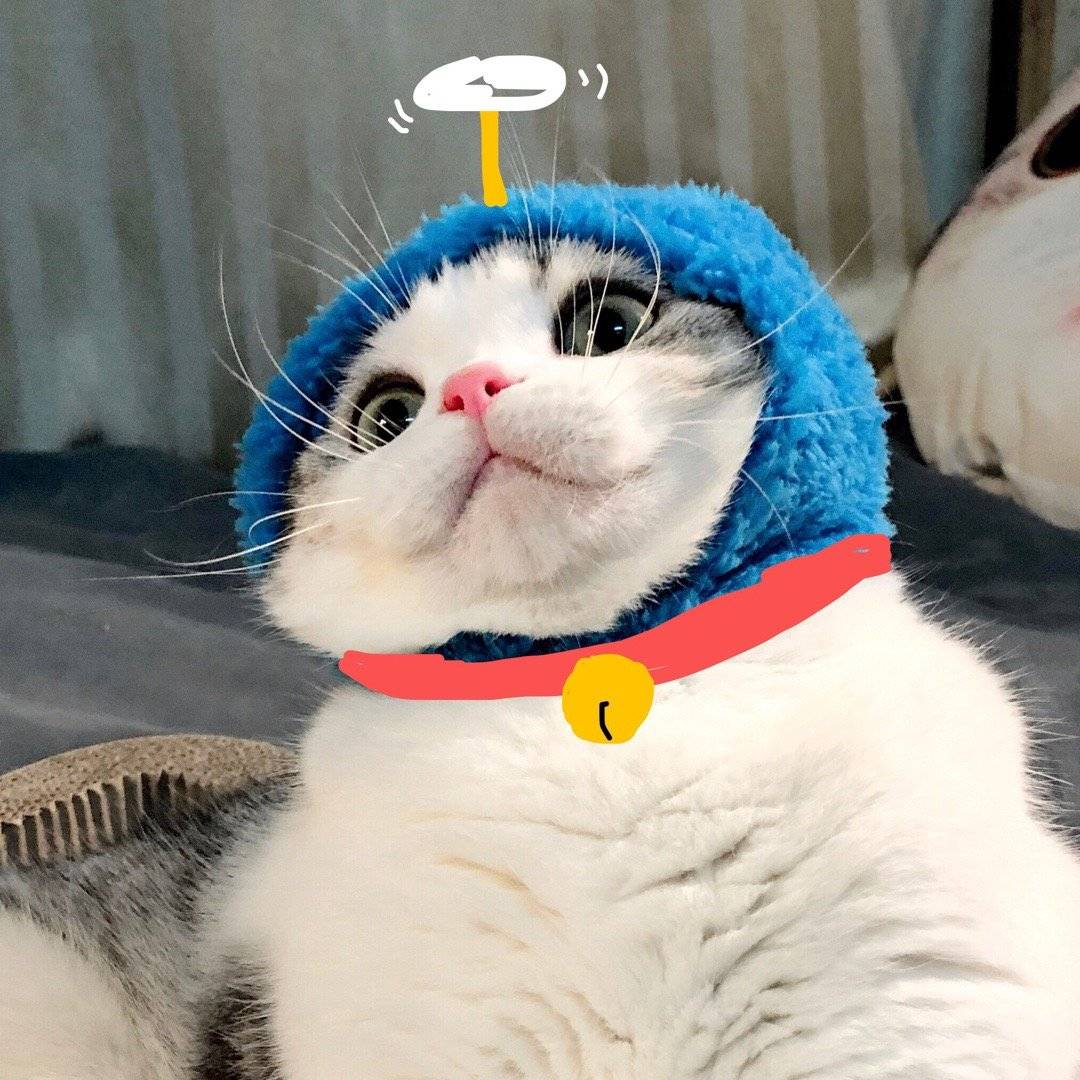

In [7]:
def admm_lasso(X, y, lam, rho=1., Max_Iter=50, RelTol=0.001):
    m,n = X.shape
    Xty = X.T.dot(y)  #转置及点乘#
    Beta1 =  np.linalg.inv(X.T.dot(X)+rho*np.identity(n)) 

    Beta = np.zeros((n,1))
    Alpha = np.zeros((n,1))
    W = np.zeros((n,1))
    
    for i in range(Max_Iter):
        
        # update Beta
        
        Beta = Beta1.dot(Xty+rho*(Alpha-W))
        
        # update alpha
        
        A_hold = np.copy(Alpha)
        Alpha = np.maximum(0.,Beta+(W/rho)-(lam/rho)) - np.maximum(0., -(Beta+(W/rho))-(lam/rho))
        
        # update W
        
        W = W+rho*(Beta-Alpha)
        
        # break condition
        
        if ((((Alpha-Beta)**2).sum()**0.5)<RelTol) or ((((Alpha-A_hold)**2).sum()**0.5)<RelTol):
            break

    return Beta